# 01. Prepare Problem

A fashion Industry has hired you to build a virtual stylist assistant and needs your help to do a targeted campaign. They want you to give them a metric that help them to selectively filter their product as per customer needs.

We are given a data frame(train and test) that have total 28*28 = 784+1(label tag) features columns that represent a image of 28x28 pixels which is output of flattening

Each training and test example is assigned to one of the following labels:
* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

## Question : 

**Plan:**
1. Scan photos(from. instagram/facebook) of individual to detect items a person use & love to wear. Tag a image.
2. This Image Tag can be used to do the targeted marketing by showing the fashion category they loves.



> ### 1.1 Load Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

import os
os.chdir('D:\\data\\fashionmnist')

> ### 1.2 Load Data

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 02. Summarize Data

In [5]:
import pally as pal
pal.eda.print_null_cntNpct([train,test])

Total Missing Features : 0.

Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []
Total Missing Features : 0.

Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []
All Missing Column  in the data frames : 

set()


In [6]:
train.shape

(60000, 785)

In [7]:
test.shape

(10000, 785)

**Findings:** 
1. Lable is present in test set also
2. There is no missing feature

# 03. Visualize Data

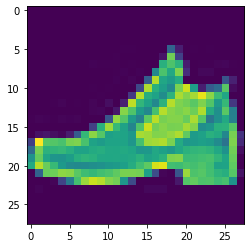

In [8]:
plt.imshow(np.array(train.iloc[1,1:]).reshape(28,28))

In [9]:
# converting frame into array
train = np.array(train)
test = np.array(test)

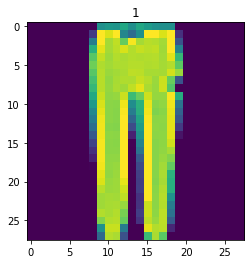

In [10]:
i = randint(0,59999)
plt.imshow(train[i,1:].reshape(28,28))
plt.title(train[i,0]) # Plotting labels
plt.show()

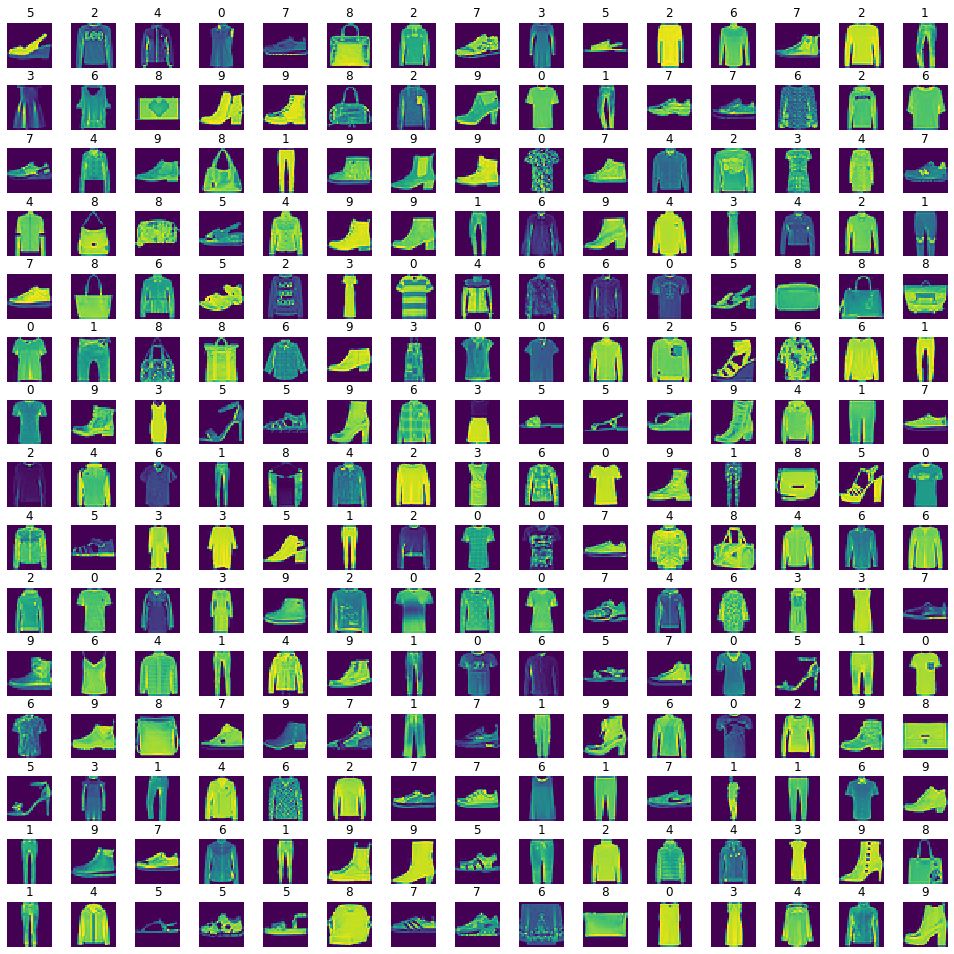

In [11]:
# Plotting some samples
row = 15
col = 15
fig, axes = plt.subplots(row,col,figsize=(17,17))

axes = axes.ravel()

for i in range(0,row*col):
    random_number = randint(0,59999)        # getting a random number in range of the training sample
    axes[i].imshow(train[random_number,1:].reshape(28,28)) # ploting a random image on axes
    axes[i].set_title(train[random_number,0]) # plotting label of image as its title
    axes[i].axis('off')      # disabling the axis

plt.subplots_adjust(hspace=0.4) # Adjusting the spacing between the images

# 04. Evaluate Algorithms

> ### 4.1. Convolution Neural Network

In [12]:
x_train = train[:,1:]
y_train = train[:,0]

x_test = test[:,1:]
y_test = test[:,0]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [14]:
# formatting into image format i.e. 28x28x1(1 is a channel)
x_train = x_train.reshape(x_train.shape[0],*(28,28,1))
x_validate = x_validate.reshape(x_validate.shape[0],*(28,28,1))
x_test = x_test.reshape(x_test.shape[0],*(28,28,1))

In [15]:
x_train.shape

(48000, 28, 28, 1)

In [16]:
x_validate.shape

(12000, 28, 28, 1)

In [17]:
x_test.shape

(10000, 28, 28, 1)

**Modelling**

In [18]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [19]:
# Initializing a model
model = Sequential()

In [20]:
# Convolition
model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu')) # Layer 1

In [21]:
# Max Pooling
model.add(MaxPool2D(pool_size=(2,2)))

In [22]:
# Flatenning
model.add(Flatten())

In [23]:
# Full Connection Layer - Hidden Layer
model.add(Dense(output_dim = 32,activation='relu')) # Layer 1
model.add(Dense(output_dim = 32,activation='relu')) # Layer 2

In [24]:
# Full Connection Layer - Output Layer
model.add(Dense(output_dim = 10,activation='sigmoid'))

In [25]:
# Compiling
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
# Image Augmentation - DO NOT RUN
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

In [27]:
# training
model.fit(x_train,y_train,batch_size=128,
                    epochs=10,
                    validation_data=(x_validate,y_validate)
                   )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 12s 241us/step - loss: 1.6388 - acc: 0.3584 - val_loss: 1.0479 - val_acc: 0.3921
Epoch 2/10
48000/48000 [==============================] - 11s 232us/step - loss: 0.7967 - acc: 0.4772 - val_loss: 0.5797 - val_acc: 0.6102
Epoch 3/10
48000/48000 [==============================] - 13s 271us/step - loss: 0.5338 - acc: 0.5985 - val_loss: 0.5477 - val_acc: 0.6024
Epoch 4/10
48000/48000 [==============================] - 13s 272us/step - loss: 0.4764 - acc: 0.6344 - val_loss: 0.5219 - val_acc: 0.6538
Epoch 5/10
48000/48000 [==============================] - 13s 270us/step - loss: 0.4398 - acc: 0.6905 - val_loss: 0.5157 - val_acc: 0.7335
Epoch 6/10
48000/48000 [==============================] - 13s 269us/step - loss: 0.2399 - acc: 0.9084 - val_loss: 0.3162 - val_acc: 0.8929
Epoch 7/10
480

In [28]:
# Evaluating on the test data
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 56us/step


[0.32925269870758056, 0.9024]

In [29]:
# Predict classes
model.predict_classes(x_test)

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [30]:
# Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,model.predict_classes(x_test))

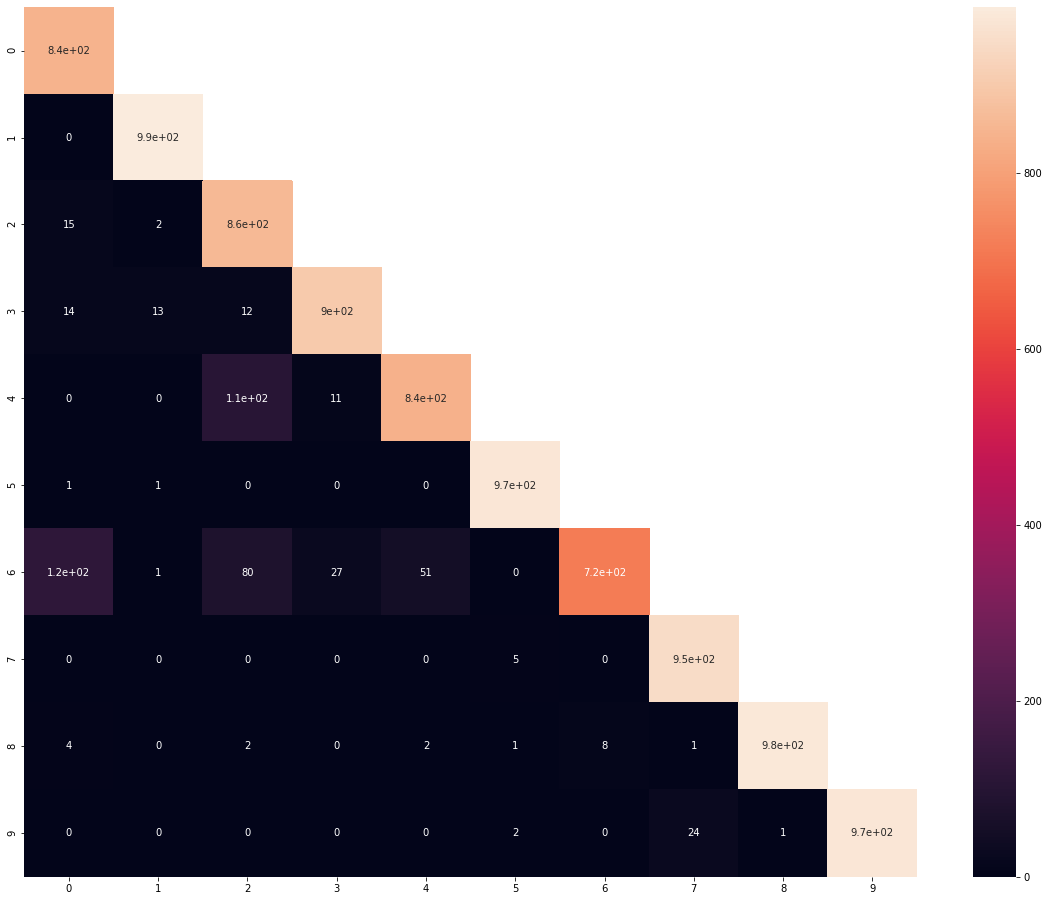

In [44]:
plt.rcParams['figure.figsize']=(20,16)
sns.heatmap(cm,annot=True,mask=np.triu(np.ones_like(cm),k=1))

In [32]:
print(classification_report(y_test,model.predict_classes(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.98      0.99      0.99      1000
           2       0.79      0.86      0.82      1000
           3       0.93      0.90      0.92      1000
           4       0.85      0.84      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.72      0.74      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



**Conclusion:** Low precision for class 2 and class 6 is dragging the overall accuracy of oue model

# 05. Imporve Model

1. Can we just train our model for class 2 and class 6 to lift their accuracy?
2. Can we utilize dropout for lifting model performance?
3. Can more hidden layers increases performance?
4. Can High resolution image/Colored Image helps?

# 06. Finalize Model